In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

In [10]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [11]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
          
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0],
                  'WingDomain' : 'NA'
                  }
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7],
                  'WingDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0]
                  }
    
    
    return ra1_df, ra1_dict

In [12]:
#filled with BBG; No change but decimation

#Make plot for full and Body only to look at 
data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Pure Decimations/'

#0.78125  
f1=data_dir+'0008/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0008_1000_94_MirkLBG.ra1'
#1.6
f2=data_dir+'0016/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0016_1000_94_MirkLBG.ra1'
#6.125
f3=data_dir+'0062_5/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0063_1000_94_MirkLBG.ra1'
#25
f4=data_dir+'0250/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkLBG.ra1'
#87.5 
f5=data_dir+'0875/Only_Body/LepidopteraNoctuidaeMoth_12_OnlyBody_na_0875_1000_94_MirkLBG.ra1'



In [13]:
files=[f1,f2,f3,f4,f5]

radiation_data=[]
radiation_metadata=[]
for f in files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

LepidopteraNoctuidaeMoth_12_OnlyBody_na_0008_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0016_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0063_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0875_1000_94_MirkLBG


### Should we Replace with Shaved?

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


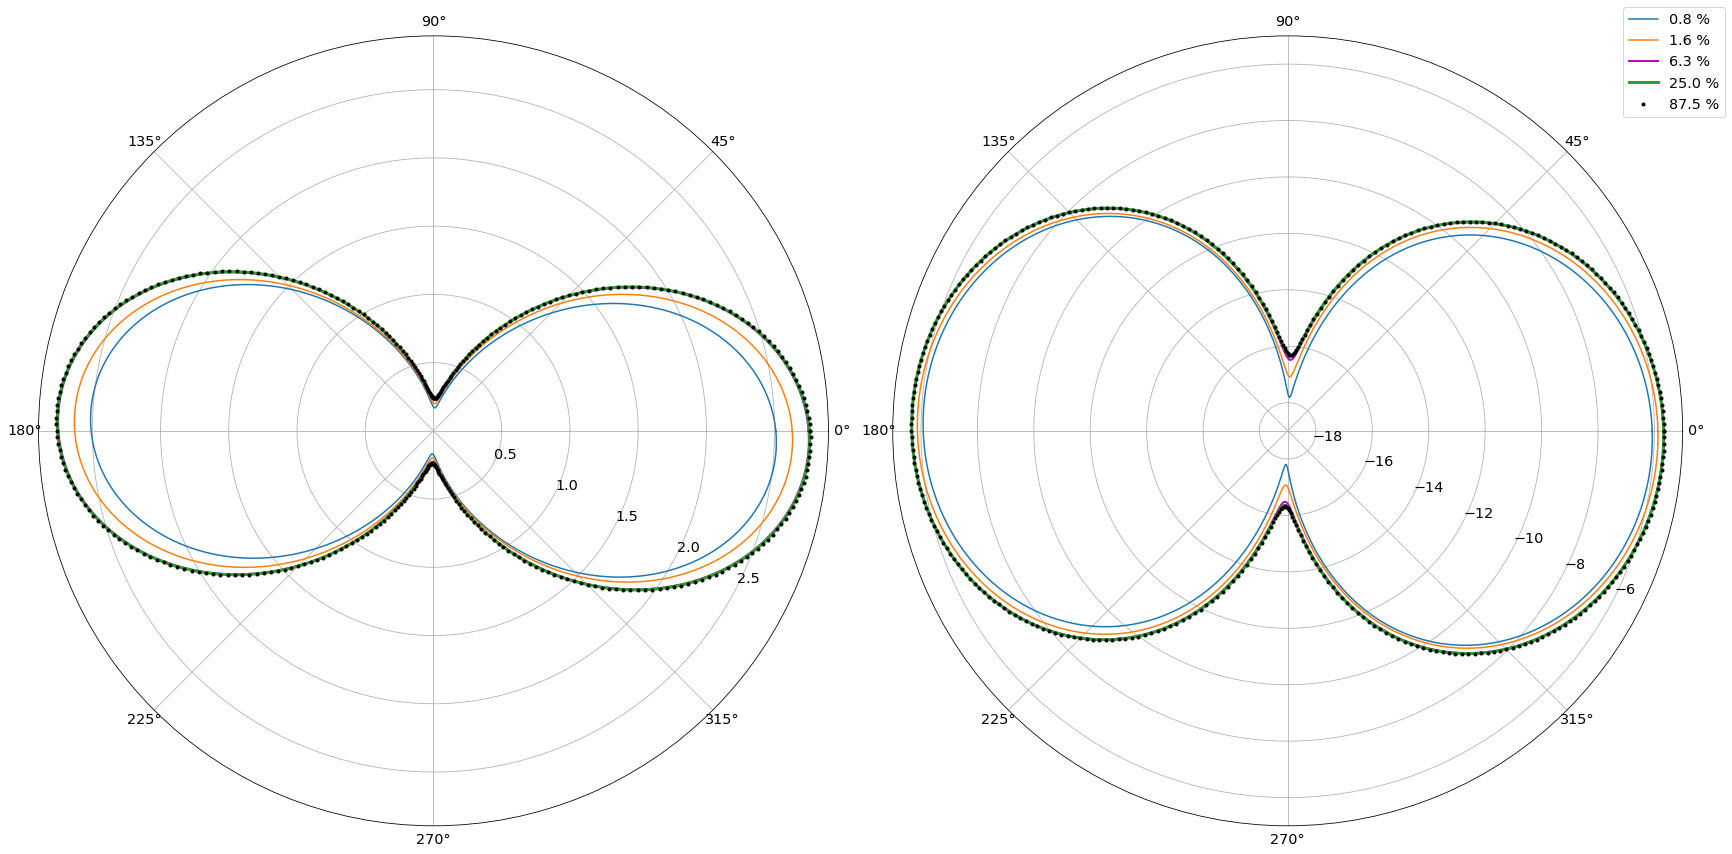

In [14]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=[24,16], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx]['Resolution'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs[0].plot(angle,r, 'k.', label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-3:
        axs[0].plot(angle,r, 'm', linewidth=2, label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-2:
        axs[0].plot(angle,r, linewidth=3, label=str(radiation_metadata[idx]['Resolution'])+' %')
    else:
        axs[0].plot(angle,r,label=str(radiation_metadata[idx]['Resolution'])+' %')
axs[0].set_rlabel_position(-27) 

max_r=[]
min_r=[]
n=[]

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS_dB'].loc[radiation_data[idx]['theta'] == -90.0]
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx]['Resolution'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs[1].plot(angle,r, 'k.', label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-3:
        axs[1].plot(angle,r, 'm', linewidth=2, label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-2:
        axs[1].plot(angle,r, linewidth=3, label=str(radiation_metadata[idx]['Resolution'])+' %')
    else:
        axs[1].plot(angle,r,label=str(radiation_metadata[idx]['Resolution'])+' %')

    
axs[1].set_rmin(-19)
axs[1].set_rmax(-5)
axs[1].set_rlabel_position(-27) 
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(.8 + np.cos(45)/2, .62 + np.sin(45)/2))
plt.tight_layout()
fig.show()

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


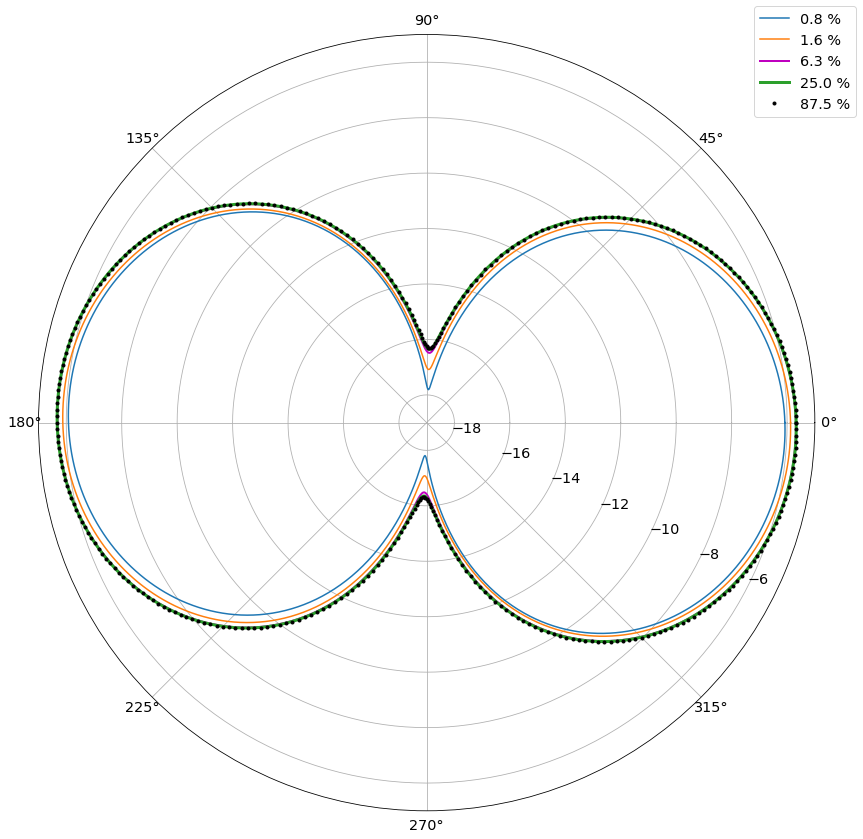

In [15]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[12,16], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#plt.suptitle('Noctuid Decimation versus RCS Comparison ($dB$)', y=.85,fontsize ='x-large')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS_dB'].loc[radiation_data[idx]['theta'] == -90.0]
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx]['Resolution'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k.', label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-3:
        axs.plot(angle,r, 'm', linewidth=2, label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-2:
        axs.plot(angle,r, linewidth=3, label=str(radiation_metadata[idx]['Resolution'])+' %')
    else:
        axs.plot(angle,r,label=str(radiation_metadata[idx]['Resolution'])+' %')

    
axs.set_rmin(-19)
axs.set_rmax(-5)
axs.set_rlabel_position(-27) 
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(.8 + np.cos(45)/2, .62 + np.sin(45)/2))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


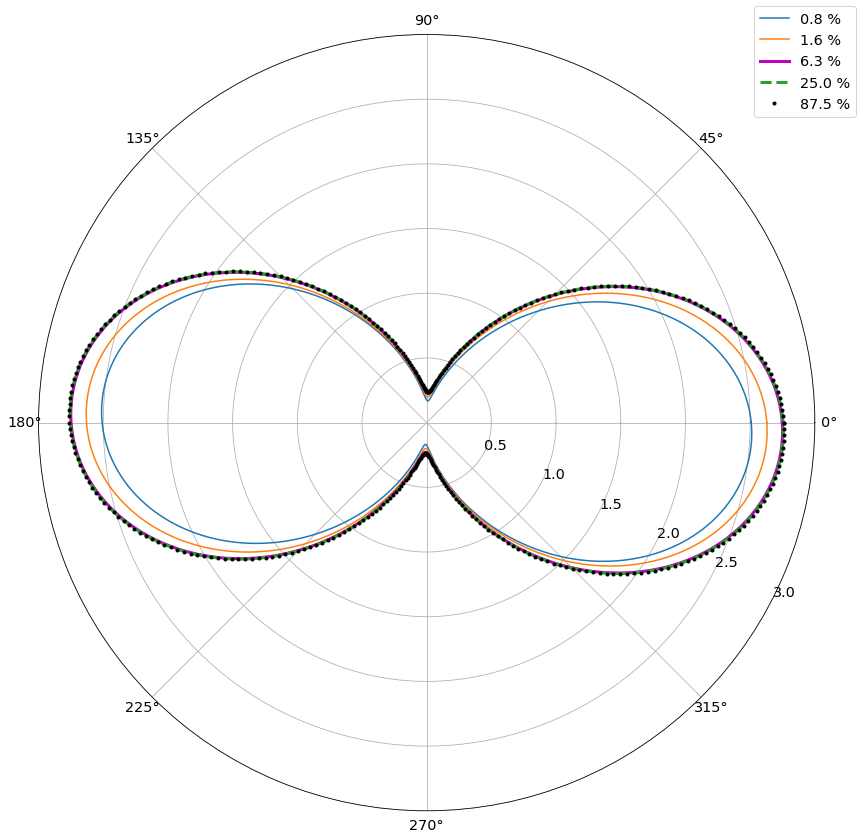

In [24]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[12,16], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx]['Resolution'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k.', label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-3:
        axs.plot(angle,r, 'm', linewidth=3, label=str(radiation_metadata[idx]['Resolution'])+' %')
    elif idx==len(radiation_data)-2:
        axs.plot(angle,r, linewidth=3, linestyle='dashed', label=str(radiation_metadata[idx]['Resolution'])+' %')
    else:
        axs.plot(angle,r,label=str(radiation_metadata[idx]['Resolution'])+' %')
axs.set_rlabel_position(-27) 

axs.set_rmin(0)
axs.set_rmax(3)

plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(.8 + np.cos(45)/2, .62 + np.sin(45)/2))
plt.tight_layout()
fig.show()

plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure4.svg', format='svg', dpi=1200)